In [1]:
import os
from glob import glob
import argparse
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def readcsv(path):
    df = pd.read_csv(path)
    df = normalization(df,1000)
    return df

In [9]:
# 繪製單一頻響圖型
def plot_Raw(Raw,xfig,yfig,file_path):
    #fig = plt.figure(figsize=(20, 10))
    plt.plot(Raw.frequency, Raw.raw, label="Raw", color='gray', alpha=1)
    plt.semilogx()
    plt.legend()
    plt.grid()
    plt.xlabel("frequencyuency")
    plt.ylabel("Amplitude")
    if file_path is not None:
        #file_path = os.path.abspath(file_path)
        plt.savefig(file_path+"_FR.png",dpi=600)
        print("Have save fig into "+file_path+"_FR.png")

# 繪製雙頻響圖型與兩者誤差
def plot_TargetRaw(Raw,Target,xfig,yfig,file_path):
    fig = plt.figure(figsize=(xfig, yfig))
    plt.plot(Raw.frequency, Raw.raw, label="Raw", color='gray', alpha=1)
    plt.plot(Target.frequency, Target.raw, label="Target", color='#0072BD', alpha=1)
    if(Raw.shape[0]!=Target.shape[0]):
        plt.plot(Target.frequency, Raw.raw-Target.raw, label="error", color='brown', alpha=0.5)
        print("Shape different")
    plt.semilogx()
    plt.legend()
    plt.grid()
    plt.xlabel("frequencyuency")
    plt.ylabel("Amplitude")
    if file_path is not None:
        #file_path = os.path.abspath(file_path)
        plt.savefig(file_path+"_FR.png",dpi=600)
        print("Have save fig into "+file_path+"_FR.png")

# 繪製虛擬耳機之相關參數
def plot_Equalization(Raw,Target,Equalization,xfig,yfig,file_path):
    fig = plt.figure(figsize=(xfig, yfig))
    plt.plot(Raw.frequency, Raw.raw, label="Raw", color='gray')
    plt.plot(Target.frequency, Raw.raw-Target.raw, label="Error", color='brown')
    plt.plot(Equalization.frequency, Equalization.raw,label='LimitEqualization', linewidth=5, color='lightgreen',alpha=0.5)
    plt.plot(Target.frequency, Target.raw-Raw.raw, label="Equalization", color='green')
    plt.plot(Equalization.frequency, Equalization.raw+Raw.raw, label="Equalized", linewidth=5, color='lightblue',alpha=0.5)
    plt.plot(Target.frequency, Target.raw, label="Target", linewidth=1, color='steelblue')
    plt.semilogx()
    plt.legend()
    plt.grid()
    plt.xlabel("frequencyuency")
    plt.ylabel("Amplitude")
    if file_path is not None:
            #file_path = os.path.abspath(file_path)
            plt.savefig(file_path+"_Equalization.png",dpi=600)
            print("Have save fig into "+file_path+"_Equalization.png")

In [10]:
# 正規化誤差
def normalization(df,freq):
    error = 100000
    for i in range(df.shape[0]):
        tfreq = df.frequency[i]
        tmp = abs(freq - tfreq)
        if(tmp<error):
            error = tmp
            noramlization = i
    error = 0 - df.raw[noramlization]
    df.raw = df.raw + error
    #最近與標準之誤差值
    #print("最近與標準之原誤差值 = ",error)
    #最近與標準誤差值之index
    #print("最近與標準誤差值之index = ",noramlization)
    #最近與標準誤差值之數值
    #print("正規化後數據",df.frequency[noramlization],df.raw[noramlization])
    return df

#Calculate Equalization
def Equalize(raw,target):
    #Target - raw
    Equalization = target.raw-raw.raw
    Equalization
    Equalization = pd.DataFrame({"frequency":raw.frequency,"raw":Equalization})
    return Equalization

# 耳機最大raw限制
def limitation(df,limit):
    for i in range(df.shape[0]):
        if(df.raw[i]>limit):
            df.raw[i]=limit
    return df

# Audacity limit
# Audacity自動匯入系統限制為200plot
# 將特徵點減少至1/4以便使用Audacity自動匯入系統
def Smooth(df,num):
    sdf = pd.DataFrame({"frequency":[],"raw":[]})
    for i in range(df.shape[0]):
        if(i%int(num)==0):
            add = {'frequency': df.frequency[i], 'raw': df.raw[i]}
            sdf = sdf.append(add, ignore_index = True)
    return sdf

def virtualization(raw,target,limit):
    Equalization = Equalize(raw,target)
    Equalization = limitation(Equalization,limit)
    if(raw.shape[0]>200):
        num = int(raw.shape[0]/200)
        if((raw.shape[0]/num)>200):
            num+=1
        #print(num)
        #Equalization = Smooth(Equalization,num)
    return Equalization

In [11]:
def batch_processing(Raw_csv=None, output_name="./outputs",Target_csv=None,Virtualize=False,Limit=1000,xfig=6,yfig=4):
    if(Virtualize and Target_csv):
        print("------Virtualize Script Start-----")
        Raw = readcsv(Raw_csv)
        Target = readcsv(Target_csv)
        result = virtualization(Raw,Target,Limit)
        plot_Equalization(Raw,Target,result,xfig,yfig,output_name)
        result.to_csv(output_name+'.csv', index=False)
        print("Have save csv into "+output_name+'.csv')
        print("------Virtualize Script End-----")
    elif(Target_csv):
        print("------Compare Plot------")
        Raw = readcsv(Raw_csv)
        Target = readcsv(Target_csv)
        plot_TargetRaw(Raw,Target,xfig,yfig,output_name)
        print("------Compare Plot-----")
    else:
        print("------Raw Plot------")
        Raw = readcsv(Raw_csv)
        plot_Raw(Raw,xfig,yfig,output_name)
        print("------Raw Plot------")

    return Target_csv

In [42]:
Target = "./octave_Sony_MH750.csv"
Raw = "./octave_Xiaomi_Piston_2.csv"
output_name = "./octave_MI_to_MH750"

------Raw Plot------
Have save fig into ./octave_MI_to_MH750_FR.png
------Raw Plot------


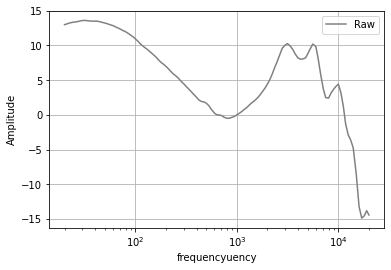

In [43]:
batch_processing(Raw,output_name)

------Compare Plot------
Have save fig into ./octave_MI_to_MH750_FR.png
------Compare Plot-----


'./octave_Sony_MH750.csv'

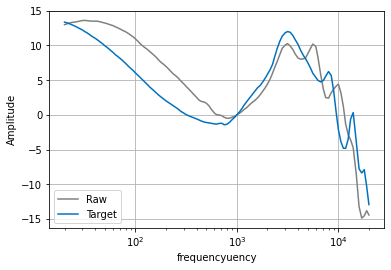

In [44]:
batch_processing(Raw,output_name,Target)

------Virtualize Script Start-----
Have save fig into ./octave_MI_to_MH750_Equalization.png
Have save csv into ./octave_MI_to_MH750.csv
------Virtualize Script End-----


'./octave_Sony_MH750.csv'

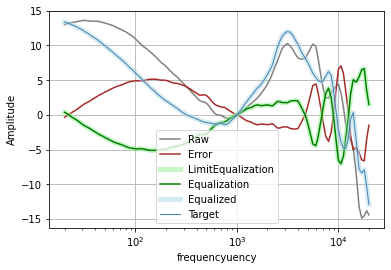

In [45]:
batch_processing(Raw,output_name,Target,True)